#DEBOSHREE MAZUMDAR(deboshre)- 50291550
#teammate: VANDANA PRASAD GAALLEE(vandanap)-50289877

#### Influenza Positive tests reported to CDC by US Clinical laboratories,National Summary, 2018-2019 season

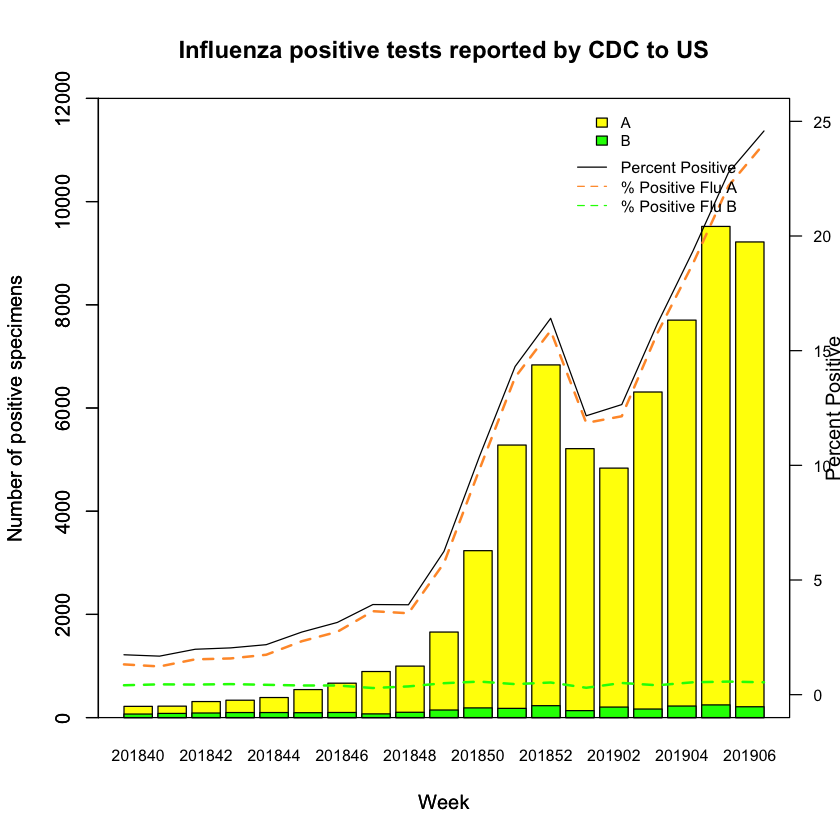

In [5]:
myData<-read.csv(file="data_graphs.csv", header=TRUE, sep=",")
#reading dataset and saving to variable
barplot(myData$Total.A, main="Influenza positive tests reported by CDC to US",
        xlab= "Week", ylab = "Number of positive specimens", col="yellow", ylim= c(0,12000))
par(new=T)
barplot(myData$Total.B,xlab= "Week", ylab = "Number of positive specimens", 
        col="green", ylim= c(0,12000), names.arg = myData$Week,cex.names=0.8)

par(new=T)
plot(myData$X..Positive, col="black", type="l", ylim=c(0,25), ylab="" ,xaxt="n",yaxt="n",
     xlab="")
# second y-axis
axis(4, cex.axis= 0.8, las = 2)
mtext("Percent Positive", side = 4.5, line = 1.30)
par(new=T)
lines(myData$Percent.Positive.A, col="#FF9933",
      type="l", lty=2,lwd=2, ylim=c(0,25), xlab="", ylab="" ,xaxt="n",yaxt="n")
par(new=T)
lines(myData$Percent.Positive.B, col="green", type="l", 
      lty=2,lwd=2, ylim=c(0,25), xlab="", ylab="" ,xaxt="n",yaxt="n")

legend("topright",inset=c(0.22,0.01) ,legend=c("A","B"),fill=c("yellow", "green"), 
       cex = 0.75, box.lty=0, pt.cex = 0.5)
legend("topright",inset=c(0.06,0.08),legend=c("Percent Positive","% Positive Flu A",
        "% Positive Flu B"), col=c("black", "#FF9933", "green"), lty=c(1,2,2), cex=0.8, box.lty=0)

#### Influenza Positive tests reported to CDC by US Public Health laboratories,National Summary, 2018-2019 season

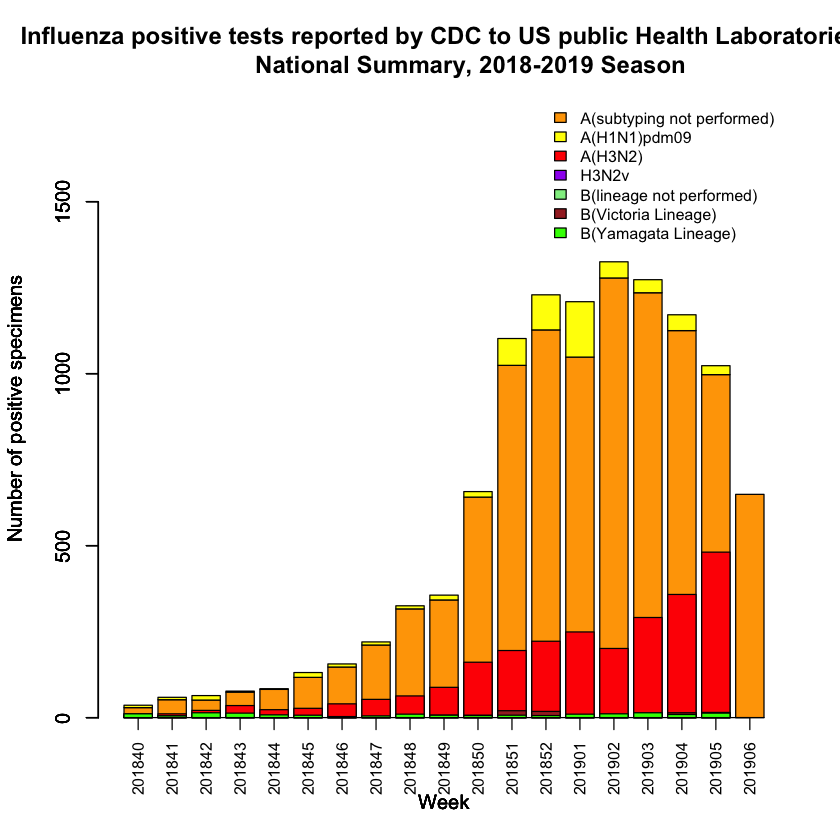

In [2]:
data<- read.csv(file="secondData.csv", header=TRUE, sep=",")
A2 <- data$A.Subtyping.not.performed
B2 <- data$A..H1N1.pdm09
data2=data.frame(B2,A2)
colors <- c("orange","yellow")
barplot(as.matrix(as.data.frame(t(data2))),beside=F,xlab="Week",names.arg=data$Week, 
        col=colors,axis.lty="solid",
        ylim=range(0,1800),ylab="Number of positive specimens", las = 2, yaxt="n", cex.names=0.8)
par(new=T)
barplot(data$A.H3., main="Influenza positive tests reported by CDC to US public Health Laboratories,
        National Summary, 2018-2019 Season", xlab= "Week", ylab = "Number of positive specimens", 
        col="red", ylim= c(0,1800), xaxt ="n")
par(new=T)
barplot(data$A.H3N2v., 
        xlab= "Week", ylab = "Number of positive specimens", col="purple", ylim= c(0,1800),
        names.arg = data$Week, xaxt="n")
par(new=T)
barplot(data$B, 
        xlab= "Week", ylab = "Number of positive specimens", col="lightgreen", ylim= c(0,1800))
par(new=T)
barplot(data$BVIC,
        xlab= "Week", ylab = "Number of positive specimens", col="brown", ylim= c(0,1800))
par(new=T)
barplot(data$BYAM,  
        xlab= "Week", ylab = "Number of positive specimens", col="#33FF00", ylim= c(0,1800))

legend("topright", legend=c("A(subtyping not performed)", "A(H1N1)pdm09", "A(H3N2)","H3N2v",
        "B(lineage not performed)","B(Victoria Lineage)","B(Yamagata Lineage)"),
      fill=c("orange", "yellow", "red", "purple", "lightgreen", "brown", "#33FF00"),cex=0.8, bty="n")

#### A Weekly Influenza Surveillance Report Prepared by the Influenza Division
Influenza-Like Illness (ILI) Activity Level Indicator Determined by Data Reported to ILINet

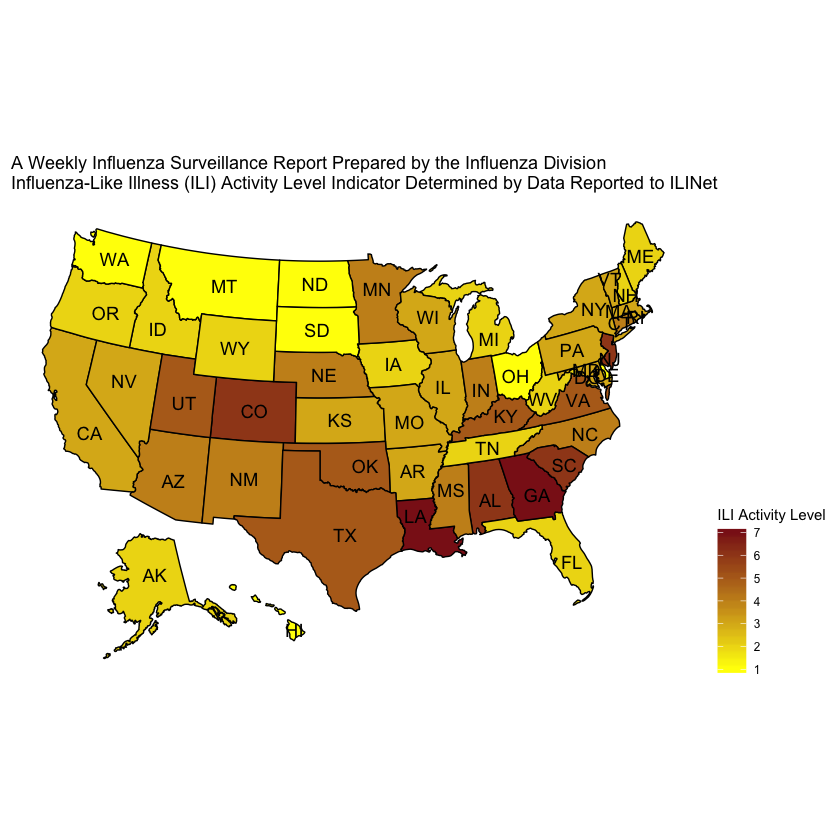

In [1]:
mydata1 <- read.csv(file="heatmap.csv", header=TRUE, sep=",")
mydata2 <-  data.frame(mydata1$STATENAME,mydata1$ACTIVITY.LEVEL,mydata1$ACTIVITY.LEVEL.LABEL)
#new dataframe is created as the number of columns required from the original dataset is just the above mentioned.
mydata2$mydata1.ACTIVITY.LEVEL = as.numeric(substr(mydata2$mydata1.ACTIVITY.LEVEL,6,8))
#this would convert level10 to 10, so as to get numeric data only.
averaged_data= aggregate(mydata2$mydata1.ACTIVITY.LEVEL, list(mydata2$mydata1.STATENAME), mean)
#we take an average for each state over the span of week 40 to week 4.
averaged_data[,2] <-round(averaged_data[,2],0)
#the values are rounded off to 0 decimal places so as to remove float values.
names(averaged_data)[names(averaged_data) == 'Group.1'] <- 'state'
names(averaged_data)[names(averaged_data) == 'x'] <- 'ACTIVITY.LEVEL'
#names of columns changed
library(usmap)
library(ggplot2)

plot_usmap(data = averaged_data, values = "ACTIVITY.LEVEL", labels = TRUE)+
 scale_fill_continuous(name = "ILI Activity Level",low ='yellow',high='firebrick4') + 
  theme(legend.position = "right") + labs(title = "A Weekly Influenza Surveillance Report Prepared by the Influenza Division
Influenza-Like Illness (ILI) Activity Level Indicator Determined by Data Reported to ILINet")


#### Pneumonia and Influenza (P&I) Mortality Surveillance

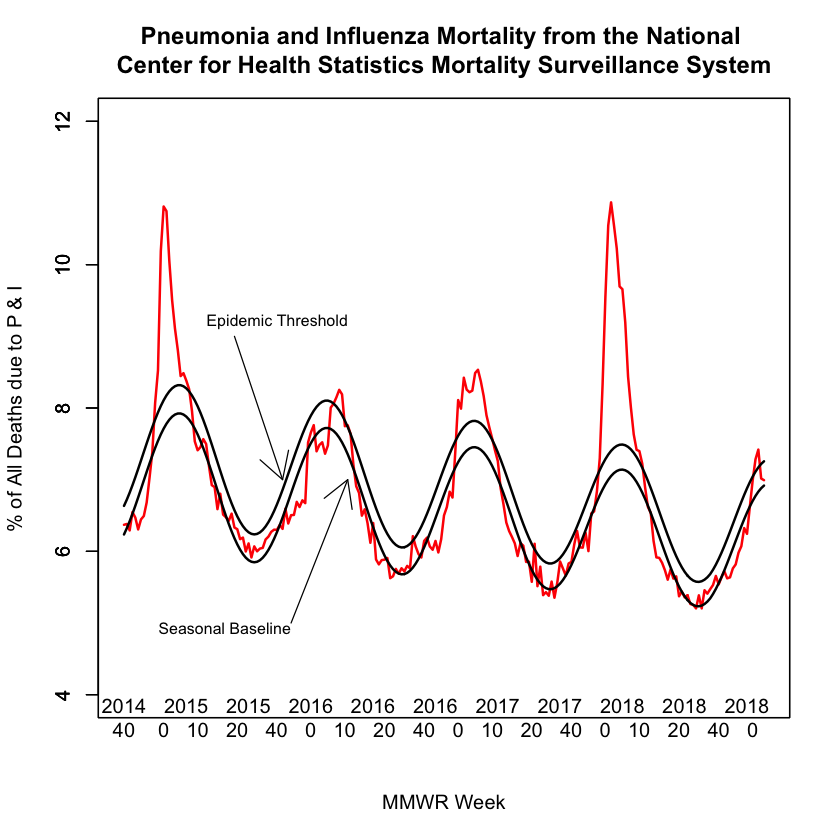

In [3]:
library(grid)
mortality<-read.csv("Mortality.csv", header=TRUE, sep=",")
year<- mortality$Year
week_label<- mortality$Week

plot(mortality$Percent.of.Deaths.Due.to.Pneumonia.and.Influenza, type="l", col="red", ylim=c(4,12),
      ylab= "% of All Deaths due to P & I", xlab="MMWR Week", xaxt="n", lwd =2)
title(main="Pneumonia and Influenza Mortality from the National 
Center for Health Statistics Mortality Surveillance System")
par(new=T)
plot(mortality$Expected, type="l", col="black", lwd=2, ylim=c(4,12), xlab="",ylab="", xaxt="n")

par(new=T)
plot(mortality$Threshold, type="l", col="black",lwd =2,ylim=c(4,12), xlab="", ylab="", xaxt="n")
mod_week_label = as.integer(week_label / 10) * 10

axis(1,at = seq(1, 227, by = 1), labels = mod_week_label, line=-1, tcl=0, lwd = 0)
#axis function is used to label and plot axis according to a sequence.
axis(1,at = seq(1, 227, by = 1), labels = year, line=-2, tcl=0, lwd = 0)
arrows(60, 5, 80, 7, col = "black")
legend(3,5.2,legend =c("Seasonal Baseline"), bty="n", cex= 0.8)
arrows(40, 9, 57, 7, col = "black")
legend(20,9.5,legend =c("Epidemic Threshold"), bty="n", cex= 0.8)
#arrows is a functio from grid library to draw arrows.

#### Pediatric deaths 

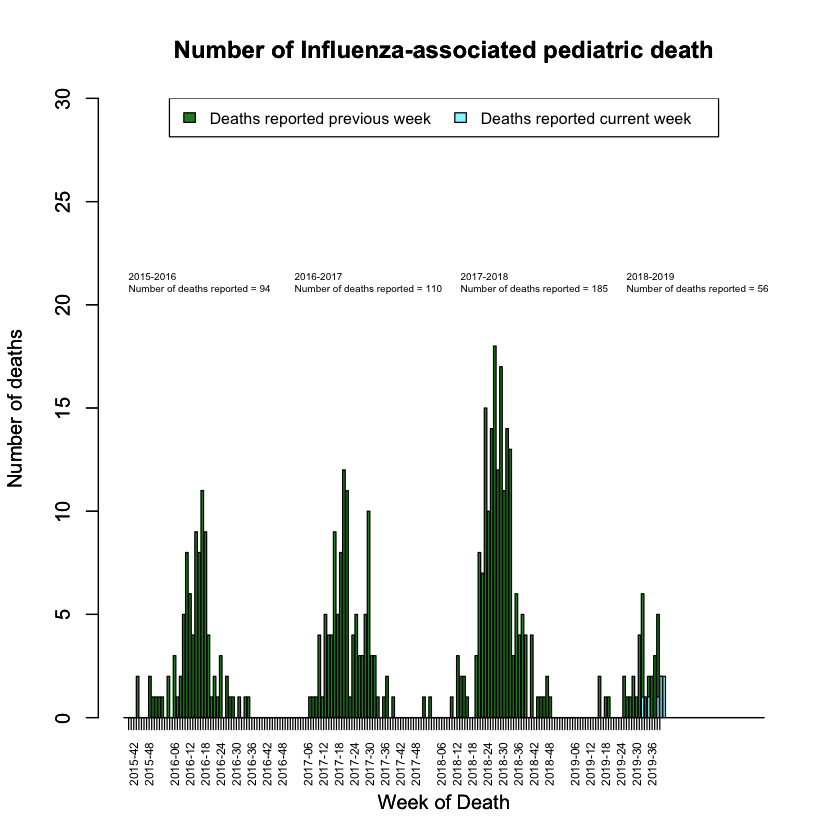

In [4]:
pediatric<-read.csv("Weekly_influenza.csv", header=TRUE, sep=",")
previous<-pediatric$PREVIOUS.WEEK.DEATHS
current<-pediatric$CURRENT.WEEK.DEATHS
week<-pediatric$WEEK.NUMBER
barplot(previous, main="Number of Influenza-associated pediatric death", 
        xlab= "Week of Death", ylab = "Number of deaths", col="forestgreen", ylim= c(0,30),
        names.arg = pediatric$WEEK.NUMBER, xaxt="n")
week_no<-as.numeric(substr(week,6,7))
week <- as.character(week)
mod_week_label <- c()
for (value in 1:length(week_no)) {
    if(as.integer(week_no[value]%%6) == 0){
        mod_week_label[value]<- week[value]        
    }
    else{
        mod_week_label[value]<- NA
    }
}
#creating a sequence to feed to the axis function.
axis(1,seq(2,209, by = 1),labels = mod_week_label, cex.axis=0.6, las =2)
#the whole x-axis cannot be labeled due to space constraint and therefore, an axis is used t
par(new=T)
barplot(current, main="Number of Influenza-associated pediatric death", 
        xlab= "Week of Death", ylab = "Number of deaths", col="cadetblue1", ylim= c(0,30))
legend(-5,22,legend=c("2015-2016","Number of deaths reported = 94",
                      "2016-2017","Number of deaths reported = 110",
                      "2017-2018","Number of deaths reported = 185",
                        "2018-2019", "Number of deaths reported = 56"), cex=0.5, ncol=4, bty="n")
legend("top",legend=c("Deaths reported previous week","Deaths reported current week"),
      fill=c("forestgreen","cadetblue1"),cex=0.8,ncol=2)
#text(srt=45,xpd=T)
#legend("bottomleft", legend=c("previous","current"),text.col = "black",horiz = T)

#### The chart 1) and 2) are provided only for the partial year. Aren’t we curious about the flu pattern for the entire year or 52 weeks? 

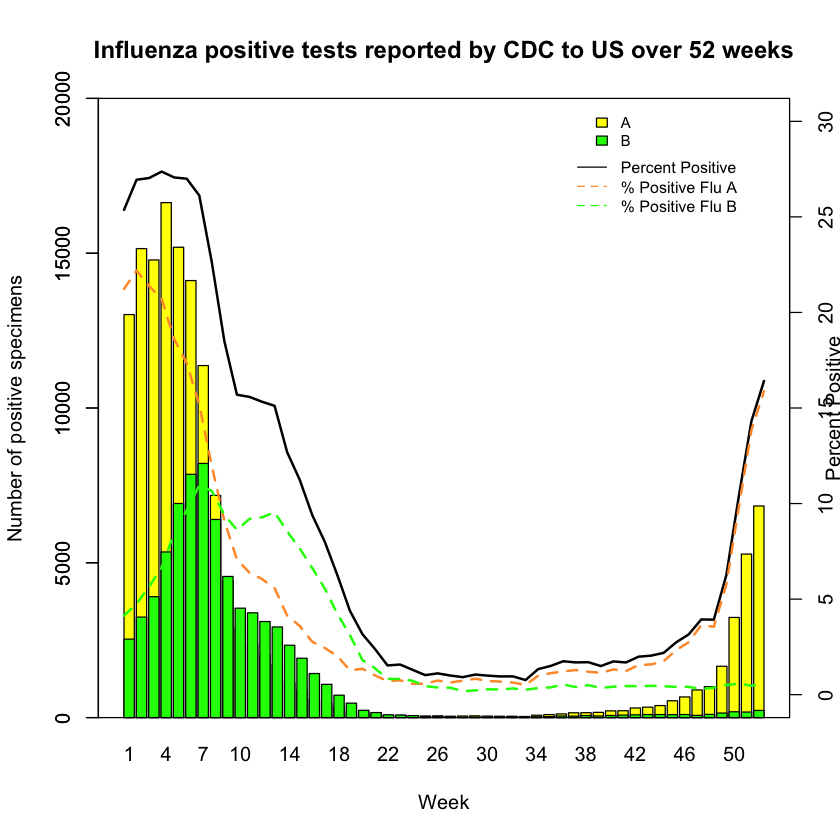

In [5]:
myData<-read.csv(file="1stgraph.csv", header=TRUE, sep=",")
barplot(myData$TOTAL.A, main="Influenza positive tests reported by CDC to US over 52 weeks", 
        xlab= "Week", ylab = "Number of positive specimens", col="yellow", ylim= c(0,20000))
par(new=T)
barplot(myData$TOTAL.B,col="green", ylim= c(0,20000), names.arg = myData$WEEK)

par(new=T)
plot(myData$PERCENT.POSITIVE, col="black", type="l", ylim=c(0,30), ylab="" ,xaxt="n",yaxt="n",
     xlab="",lwd=2)
# second y-axis
axis(4)
mtext("Percent Positive", side = 4, line = 1.30)
par(new=T)
lines(myData$PERCENT.A, col="#FF9933",type="l", lty=2,lwd=2, ylim=c(0,25), xlab="", ylab="" ,xaxt="n",yaxt="n")
par(new=T)
lines(myData$PERCENT.B, col="green", type="l", lty=2,lwd=2, ylim=c(0,25), xlab="", ylab="" ,xaxt="n",yaxt="n")
legend("topright",inset=c(0.22,0.01) ,legend=c("A","B"),fill=c("yellow", "green"), 
       cex = 0.75, box.lty=0, pt.cex = 0.5)
legend("topright",inset=c(0.06,0.08),legend=c("Percent Positive","% Positive Flu A",
        "% Positive Flu B"), col=c("black", "#FF9933", "green"), lty=c(1,2,2), cex=0.8, box.lty=0)

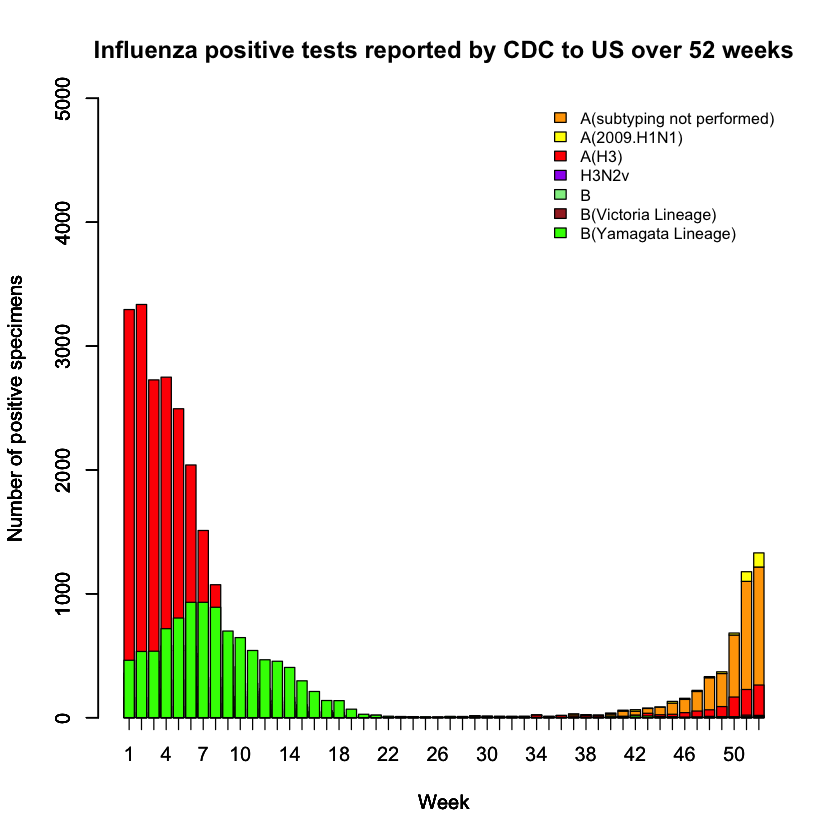

In [7]:
data<- read.csv(file="2ndgraph.csv", header=TRUE, sep=",")

A2 <- data$A..Subtyping.not.Performed.
B2 <- data$A..2009.H1N1.
data2=data.frame(B2,A2)
colors <- c("orange","yellow")
barplot(as.matrix(as.data.frame(t(data2))),beside=F,xlab="Week",names.arg=data$WEEK, 
        col=colors,axis.lty="solid",
        ylim=range(0,5000),ylab="Number of positive specimens")
par(new=T)
barplot(data$A..H3., main="Influenza positive tests reported by CDC to US over 52 weeks", 
        xlab= "Week", ylab = "Number of positive specimens", col="red", ylim= c(0,5000))
par(new=T)
barplot(data$H3N2v, 
        xlab= "Week", ylab = "Number of positive specimens", col="purple", ylim= c(0,5000),
        names.arg = data$WEEK)
par(new=T)
barplot(data$B,  
        xlab= "Week", ylab = "Number of positive specimens", col="lightgreen", ylim= c(0,5000))
par(new=T)
barplot(data$BVic,  
        xlab= "Week", ylab = "Number of positive specimens", col="brown", ylim= c(0,5000))
par(new=T)
barplot(data$BYam, 
        xlab= "Week", ylab = "Number of positive specimens", col="#33FF00", ylim= c(0,5000))
legend("topright", legend=c("A(subtyping not performed)", "A(2009.H1N1)", "A(H3)","H3N2v",
        "B","B(Victoria Lineage)","B(Yamagata Lineage)"),
      fill=c("orange", "yellow", "red", "purple", "lightgreen", "brown", "#33FF00"),cex=0.8, bty="n")

#### Now repeat this chart in 5) for just New York state. You can get this data also from the same source. Just explore around. 

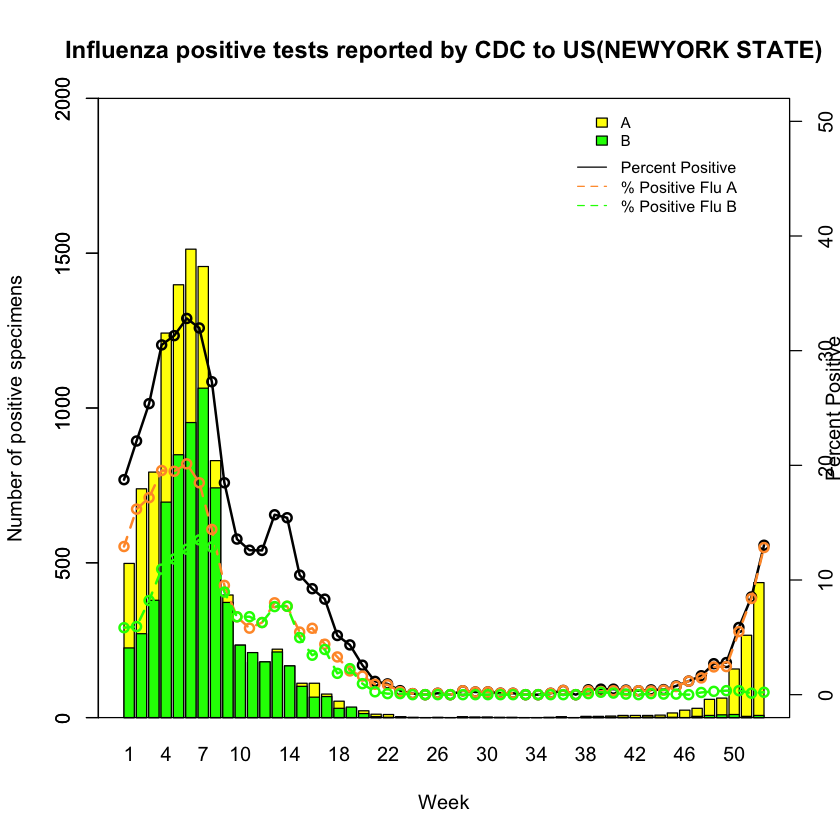

In [8]:
myData<-read.csv(file="3rdgraph.csv", header=TRUE, sep=",")

barplot(myData$TOTAL.A, main="Influenza positive tests reported by CDC to US(NEWYORK STATE)", 
        xlab= "Week", ylab = "Number of positive specimens", col="yellow", ylim= c(0,2000))
par(new=T)
barplot(myData$TOTAL.B,col="green", ylim= c(0,2000), names.arg = myData$WEEK)

par(new=T)
plot(myData$PERCENT.POSITIVE, col="black", type="o", ylim=c(0,50), ylab="" ,xaxt="n",yaxt="n",
     xlab="",lwd=2)
# second y-axis
axis(4)
mtext("Percent Positive", side = 4, line = 1.30)
par(new=T)
lines(myData$PERCENT.A, col="#FF9933",type="o", lty=2,lwd=2, ylim=c(0,25), xlab="", ylab="" ,xaxt="n",yaxt="n")
par(new=T)
lines(myData$PERCENT.B, col="green", type="o", lty=2,lwd=2, ylim=c(0,25), xlab="", ylab="" ,xaxt="n",yaxt="n")
# legend("topright", legend=c("A", "B", "Percent Positive","% Positive Flu A",
#         "% Positive Flu B"), fill=c("yellow", "green","black", "#FF9933", "lightgreen"), cex=0.8, bty="n")
legend("topright",inset=c(0.22,0.01) ,legend=c("A","B"),fill=c("yellow", "green"), 
       cex = 0.75, box.lty=0, pt.cex = 0.5)
legend("topright",inset=c(0.06,0.08),legend=c("Percent Positive","% Positive Flu A",
        "% Positive Flu B"), col=c("black", "#FF9933", "green"), lty=c(1,2,2), cex=0.8, box.lty=0)